In [35]:
#!/usr/bin/python

# Import required modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mpltkr
import matplotlib.colors as mplcolors
import matplotlib.patches as mplpatches

# Import COSMO style toolkit
import cosmoplot.colorbars as cosmocbars
import cosmoplot.utils as cosmoutils
import cosmoplot.style as cosmostyle

cosmostyle.set_style('article')
colorList = cosmostyle.color_cycle
cc = cosmostyle.color_cycle

# Learning Curves

Matrix Format: data = [pca, width, sigma, no. training points, x]

x = 0: pca  
x = 1: width  
x = 2: sigma  
x = 3: jitter  
x = 4: no. training points  
x = 5: error (MAE/RMSE)  
x = 6: standard deviation of error  

For example, data[-1, -1, -1, -1, :, 5] contains the error values for all the training points
at the final pca, width, and sigma designations. The corresponding training point values are 
stored in data[-1, -1, -1, -1, :, 4]

In [36]:
def scale_error_matrix(x):
    x[:, :, :, :, :, 2] *= 9
    x[:, :, :, :, :, 3] *= 729
    x[:, :, :, :, :, 5] *= 3
    x[:, :, :, :, :, 6] *= 3
    return x

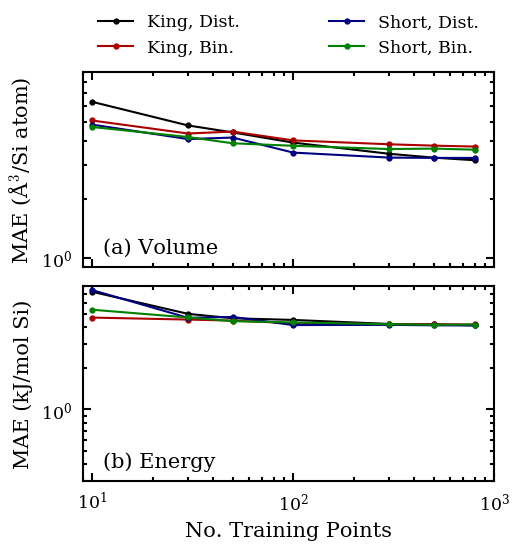

In [37]:
# Load DEEM 1k Rings
volKD = np.load('../Processed_Data/DEEM_1k/Volume/Rings/King/Distribution/Gaussian/maeAvgTest.npy')
volKB = np.load('../Processed_Data/DEEM_1k/Volume/Rings/King/Binary/Gaussian/maeAvgTest.npy')
volSD = np.load('../Processed_Data/DEEM_1k/Volume/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')
volSB = np.load('../Processed_Data/DEEM_1k/Volume/Rings/Short/Binary/Gaussian/maeAvgTest.npy')
eKD = np.load('../Processed_Data/DEEM_1k/Energy/Rings/King/Distribution/Gaussian/maeAvgTest.npy')
eKB = np.load('../Processed_Data/DEEM_1k/Energy/Rings/King/Binary/Gaussian/maeAvgTest.npy')
eSD = np.load('../Processed_Data/DEEM_1k/Energy/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')
eSB = np.load('../Processed_Data/DEEM_1k/Energy/Rings/Short/Binary/Gaussian/maeAvgTest.npy')

# Scale volume errors and standard deviation to A^3/Si atom
volKD = scale_error_matrix(volKD)
volKB = scale_error_matrix(volKB)
volSD = scale_error_matrix(volSD)
volSB = scale_error_matrix(volSB)

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axsEnergy.set_ylabel('MAE (kJ/mol Si)')

axsVolume.loglog(volKD[0, 0, 0, 0, :, 4], volKD[0, 0, 0, 0, :, 5], marker='o', label='King, Dist.')
axsVolume.loglog(volKB[0, 0, 0, 0, :, 4], volKB[0, 0, 0, 0, :, 5], marker='o', label='King, Bin.')
axsVolume.loglog(volSD[0, 0, 0, 0, :, 4], volSD[0, 0, 0, 0, :, 5], marker='o', label='Short, Dist.')
axsVolume.loglog(volSB[0, 0, 0, 0, :, 4], volSB[0, 0, 0, 0, :, 5], marker='o', label='Short, Bin.')
axsVolume.text(0.05, 0.05, '(a) Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(eKD[0, 0, 0, 0, :, 4], eKD[0, 0, 0, 0, :, 5], marker='o', label='King, Distribution')
axsEnergy.loglog(eKB[0, 0, 0, 0, :, 4], eKB[0, 0, 0, 0, :, 5], marker='o', label='King, Binary')
axsEnergy.loglog(eSD[0, 0, 0, 0, :, 4], eSD[0, 0, 0, 0, :, 5], marker='o', label='Short, Distribution')
axsEnergy.loglog(eSB[0, 0, 0, 0, :, 4], eSB[0, 0, 0, 0, :, 5], marker='o', label='Short, Binary')
axsEnergy.text(0.05, 0.05, '(b) Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

"""axsVolume.set_prop_cycle(None)
axsEnergy.set_prop_cycle(None)

axsVolume.errorbar(volKD[0, 0, 0, 0, :, 4], volKD[0, 0, 0, 0, :, 5], yerr=volKD[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volKB[0, 0, 0, 0, :, 4], volKB[0, 0, 0, 0, :, 5], yerr=volKB[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volSD[0, 0, 0, 0, :, 4], volSD[0, 0, 0, 0, :, 5], yerr=volSD[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volSB[0, 0, 0, 0, :, 4], volSB[0, 0, 0, 0, :, 5], yerr=volSB[0, 0, 0, 0, :, 6], fmt='none')

axsEnergy.errorbar(eKD[0, 0, 0, 0, :, 4], eKD[0, 0, 0, 0, :, 5], yerr=eKD[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eKB[0, 0, 0, 0, :, 4], eKB[0, 0, 0, 0, :, 5], yerr=eKB[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eSD[0, 0, 0, 0, :, 4], eSD[0, 0, 0, 0, :, 5], yerr=eSD[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eSB[0, 0, 0, 0, :, 4], eSB[0, 0, 0, 0, :, 5], yerr=eSB[0, 0, 0, 0, :, 6], fmt='none')"""

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.5), ncol=2, mode='expand')
axsVolume.set_xlim([9, 1000])
axsEnergy.set_xlim([9, 1000])
axsVolume.set_ylim([0.9, 9])
#axsVolume.set_ylim([0.3, 3])
axsEnergy.set_ylim([0.3, 8])

axsVolume.set_xticklabels([])
axsVolume.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_1k/learn_rings_1k.pdf', bbox_inches='tight')
plt.show()

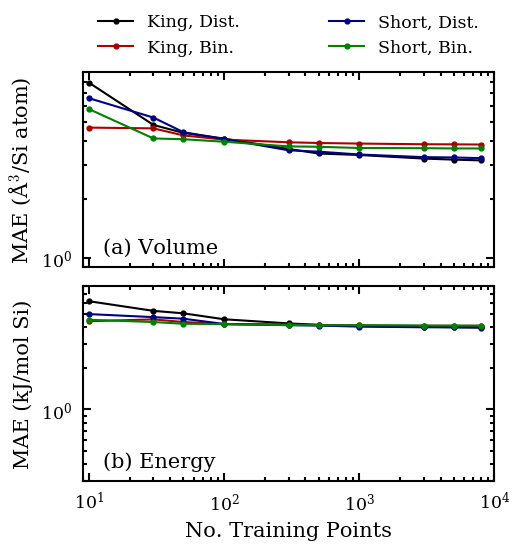

In [38]:
# Load DEEM 10k rings
volKD = np.load('../Processed_Data/DEEM_10k/Volume/Rings/King/Distribution/Gaussian/maeAvgTest.npy')
volKB = np.load('../Processed_Data/DEEM_10k/Volume/Rings/King/Binary/Gaussian/maeAvgTest.npy')
volSD = np.load('../Processed_Data/DEEM_10k/Volume/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')
volSB = np.load('../Processed_Data/DEEM_10k/Volume/Rings/Short/Binary/Gaussian/maeAvgTest.npy')
eKD = np.load('../Processed_Data/DEEM_10k/Energy/Rings/King/Distribution/Gaussian/maeAvgTest.npy')
eKB = np.load('../Processed_Data/DEEM_10k/Energy/Rings/King/Binary/Gaussian/maeAvgTest.npy')
eSD = np.load('../Processed_Data/DEEM_10k/Energy/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')
eSB = np.load('../Processed_Data/DEEM_10k/Energy/Rings/Short/Binary/Gaussian/maeAvgTest.npy')

# Scale volume errors and standard deviation to A^3/Si atom
volKD = scale_error_matrix(volKD)
volKB = scale_error_matrix(volKB)
volSD = scale_error_matrix(volSD)
volSB = scale_error_matrix(volSB)

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axsEnergy.set_ylabel('MAE (kJ/mol Si)')

axsVolume.loglog(volKD[0, 0, 0, 0, :, 4], volKD[0, 0, 0, 0, :, 5], marker='o', label='King, Dist.')
axsVolume.loglog(volKB[0, 0, 0, 0, :, 4], volKB[0, 0, 0, 0, :, 5], marker='o', label='King, Bin.')
axsVolume.loglog(volSD[0, 0, 0, 0, :, 4], volSD[0, 0, 0, 0, :, 5], marker='o', label='Short, Dist.')
axsVolume.loglog(volSB[0, 0, 0, 0, :, 4], volSB[0, 0, 0, 0, :, 5], marker='o', label='Short, Bin.')
axsVolume.text(0.05, 0.05, '(a) Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(eKD[0, 0, 0, 0, :, 4], eKD[0, 0, 0, 0, :, 5], marker='o', label='King, Distribution')
axsEnergy.loglog(eKB[0, 0, 0, 0, :, 4], eKB[0, 0, 0, 0, :, 5], marker='o', label='King, Binary')
axsEnergy.loglog(eSD[0, 0, 0, 0, :, 4], eSD[0, 0, 0, 0, :, 5], marker='o', label='Short, Distribution')
axsEnergy.loglog(eSB[0, 0, 0, 0, :, 4], eSB[0, 0, 0, 0, :, 5], marker='o', label='Short, Binary')
axsEnergy.text(0.05, 0.05, '(b) Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

"""axsVolume.set_prop_cycle(None)
axsEnergy.set_prop_cycle(None)

axsVolume.errorbar(volKD[0, 0, 0, 0, :, 4], volKD[0, 0, 0, :, 5], yerr=volKD[0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volKB[0, 0, 0, 0, :, 4], volKB[0, 0, 0, :, 5], yerr=volKB[0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volSD[0, 0, 0, 0, :, 4], volSD[0, 0, 0, :, 5], yerr=volSD[0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volSB[0, 0, 0, 0, :, 4], volSB[0, 0, 0, :, 5], yerr=volSB[0, 0, 0, :, 6], fmt='none')

axsEnergy.errorbar(eKD[0, 0, 0, 0, :, 4], eKD[0, 0, 0, 0, :, 5], yerr=eKD[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eKB[0, 0, 0, 0, :, 4], eKB[0, 0, 0, 0, :, 5], yerr=eKB[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eSD[0, 0, 0, 0, :, 4], eSD[0, 0, 0, 0, :, 5], yerr=eSD[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eSB[0, 0, 0, 0, :, 4], eSB[0, 0, 0, 0, :, 5], yerr=eSB[0, 0, 0, 0, :, 6], fmt='none')"""

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.5), ncol=2, mode='expand')
axsVolume.set_xlim([9, 10000])
axsEnergy.set_xlim([9, 10000])
#axsVolume.set_ylim([0.3, 3])
axsVolume.set_ylim([0.9, 9])
axsEnergy.set_ylim([0.3, 8])

axsVolume.set_xticklabels([])
axsVolume.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_10k/learn_rings_10k.pdf', bbox_inches='tight')
plt.show()

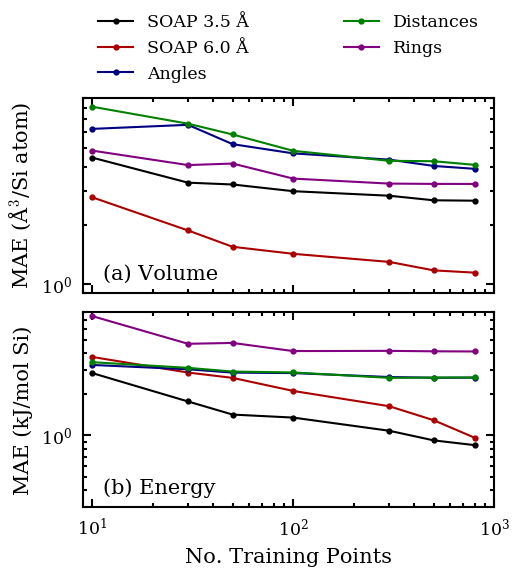

In [39]:
# Load DEEM 1k learning curves

vol3 = np.load('../Processed_Data/DEEM_1k/Volume/3.5/Gaussian/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_1k/Volume/6.0/Gaussian/maeAvgTest.npy')
e3 = np.load('../Processed_Data/DEEM_1k/Energy/3.5/Gaussian/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_1k/Energy/6.0/Gaussian/maeAvgTest.npy')
volD = np.load('../Processed_Data/DEEM_1k/Volume/Distances/Gaussian/maeAvgTest.npy')
volA = np.load('../Processed_Data/DEEM_1k/Volume/Angles/Gaussian/maeAvgTest.npy')
volR = np.load('../Processed_Data/DEEM_1k/Volume/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')
eD = np.load('../Processed_Data/DEEM_1k/Energy/Distances/Gaussian/maeAvgTest.npy')
eA = np.load('../Processed_Data/DEEM_1k/Energy/Angles/Gaussian/maeAvgTest.npy')
eR = np.load('../Processed_Data/DEEM_1k/Energy/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')

# Scale volume errors and standard deviation to A^3/Si atom
vol3 = scale_error_matrix(vol3)
vol6 = scale_error_matrix(vol6)
volD = scale_error_matrix(volD)
volA = scale_error_matrix(volA)
volR = scale_error_matrix(volR)

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axsEnergy.set_ylabel('MAE (kJ/mol Si)')

axsVolume.loglog(vol3[0, 0, 0, 0, :, 4], vol3[0, 0, 0, 0, :, 5], marker='o', label=u'SOAP 3.5 \u00c5')
axsVolume.loglog(vol6[0, 0, 0, 0, :, 4], vol6[0, 0, 0, 0, :, 5], marker='o', label=u'SOAP 6.0 \u00c5')
axsVolume.loglog(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], marker='o', label='Angles')
axsVolume.loglog(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], marker='o', label='Distances')
axsVolume.loglog(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], marker='o', label='Rings')
axsVolume.text(0.05, 0.05, '(a) Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(e3[0, 0, 0, 0, :, 4], e3[0, 0, 0, 0, :, 5], marker='o', label=u'SOAP 3.5 \u00c5')
axsEnergy.loglog(e6[0, 0, 0, 0, :, 4], e6[0, 0, 0, 0, :, 5], marker='o', label=u'SOAP 6.0 \u00c5')
axsEnergy.loglog(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], marker='o', label='Angles')
axsEnergy.loglog(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], marker='o', label='Distances')
axsEnergy.loglog(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], marker='o', label='Rings')
axsEnergy.text(0.05, 0.05, '(b) Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

"""axsVolume.set_prop_cycle(None)
axsEnergy.set_prop_cycle(None)

axsVolume.errorbar(vol3[0, 0, 0, 0, :, 4], vol3[0, 0, 0, 0, :, 5], yerr=vol3[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(vol6[0, 0, 0, 0, :, 4], vol6[0, 0, 0, 0, :, 5], yerr=vol6[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], yerr=volA[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], yerr=volD[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], yerr=volR[0, 0, 0, 0, :, 6], fmt='none')

axsEnergy.errorbar(e3[0, 0, 0, 0, :, 4], e3[0, 0, 0, 0, :, 5], yerr=e3[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(e6[0, 0, 0, 0, :, 4], e6[0, 0, 0, 0, :, 5], yerr=e6[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], yerr=eA[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], yerr=eD[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], yerr=eR[0, 0, 0, 0, :, 6], fmt='none')"""

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axsVolume.set_xlim([9, 1000])
axsEnergy.set_xlim([9, 1000])
#axsVolume.set_ylim([0.3, 3])
axsVolume.set_ylim([0.9, 9])
axsEnergy.set_ylim([0.3, 8])

axsVolume.set_xticklabels([])
axsVolume.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_1k/learn_1k.pdf', bbox_inches='tight')
plt.show()

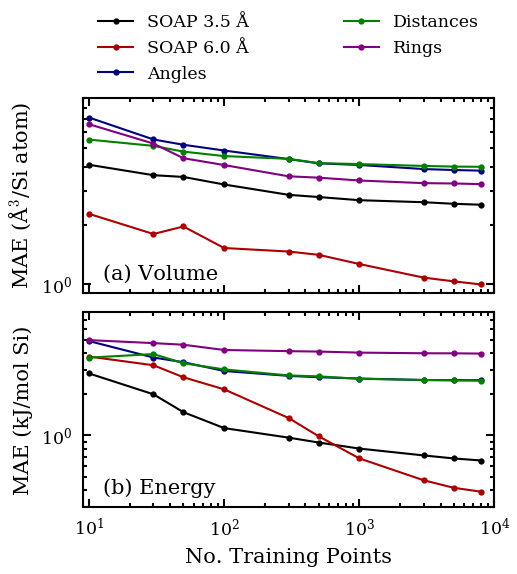

In [40]:
# Load DEEM 10k learning curves

vol3 = np.load('../Processed_Data/DEEM_10k/Volume/3.5/Gaussian/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_10k/Volume/6.0/Gaussian/maeAvgTest.npy')
e3 = np.load('../Processed_Data/DEEM_10k/Energy/3.5/Gaussian/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_10k/Energy/6.0/Gaussian/maeAvgTest.npy')
volD = np.load('../Processed_Data/DEEM_10k/Volume/Distances/Gaussian/maeAvgTest.npy') 
volA = np.load('../Processed_Data/DEEM_10k/Volume/Angles/Gaussian/maeAvgTest.npy') 
volR = np.load('../Processed_Data/DEEM_10k/Volume/Rings/Short/Distribution/Gaussian/maeAvgTest.npy') 
eD = np.load('../Processed_Data/DEEM_10k/Energy/Distances/Gaussian/maeAvgTest.npy') 
eA = np.load('../Processed_Data/DEEM_10k/Energy/Angles/Gaussian/maeAvgTest.npy') 
eR = np.load('../Processed_Data/DEEM_10k/Energy/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')

# Scale volume errors and standard deviation to A^3/Si atom
vol3 = scale_error_matrix(vol3)
vol6 = scale_error_matrix(vol6)
volD = scale_error_matrix(volD)
volA = scale_error_matrix(volA)
volR = scale_error_matrix(volR)

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axsEnergy.set_ylabel('MAE (kJ/mol Si)')

axsVolume.loglog(vol3[0, 0, 0, 0, :, 4], vol3[0, 0, 0, 0, :, 5], marker='o', label=u'SOAP 3.5 \u00c5')
axsVolume.loglog(vol6[0, 0, 0, 0, :, 4], vol6[0, 0, 0, 0, :, 5], marker='o', label=u'SOAP 6.0 \u00c5')
axsVolume.loglog(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], marker='o', label='Angles')
axsVolume.loglog(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], marker='o', label='Distances')
axsVolume.loglog(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], marker='o', label='Rings')
axsVolume.text(0.05, 0.05, '(a) Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(e3[0, 0, 0, 0, :, 4], e3[0, 0, 0, 0, :, 5], marker='o', label=u'SOAP 3.5 \u00c5')
axsEnergy.loglog(e6[0, 0, 0, 0, :, 4], e6[0, 0, 0, 0, :, 5], marker='o', label=u'SOAP 6.0 \u00c5')
axsEnergy.loglog(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], marker='o', label='Angles')
axsEnergy.loglog(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], marker='o', label='Distances')
axsEnergy.loglog(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], marker='o', label='Rings')
axsEnergy.text(0.05, 0.05, '(b) Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

"""axsVolume.set_prop_cycle(None)
axsEnergy.set_prop_cycle(None)

axsVolume.errorbar(vol3[0, 0, 0, 0, :, 4], vol3[0, 0, 0, 0, :, 5], yerr=vol3[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(vol6[0, 0, 0, 0, :, 4], vol6[0, 0, 0, 0, :, 5], yerr=vol6[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], yerr=volA[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], yerr=volD[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], yerr=volR[0, 0, 0, 0, :, 6], fmt='none')

axsEnergy.errorbar(e3[0, 0, 0, 0, :, 4], e3[0, 0, 0, 0, :, 5], yerr=e3[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(e6[0, 0, 0, 0, :, 4], e6[0, 0, 0, 0, :, 5], yerr=e6[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], yerr=eA[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], yerr=eD[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], yerr=eR[0, 0, 0, 0, :, 6], fmt='none')"""

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axsVolume.set_xlim([9, 10000])
axsEnergy.set_xlim([9, 10000])
#axsVolume.set_ylim([0.3, 3])
axsVolume.set_ylim([0.9, 9])
axsEnergy.set_ylim([0.3, 8])

axsVolume.set_xticklabels([])
axsVolume.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_10k/learn_10k.pdf', bbox_inches='tight')
plt.show()

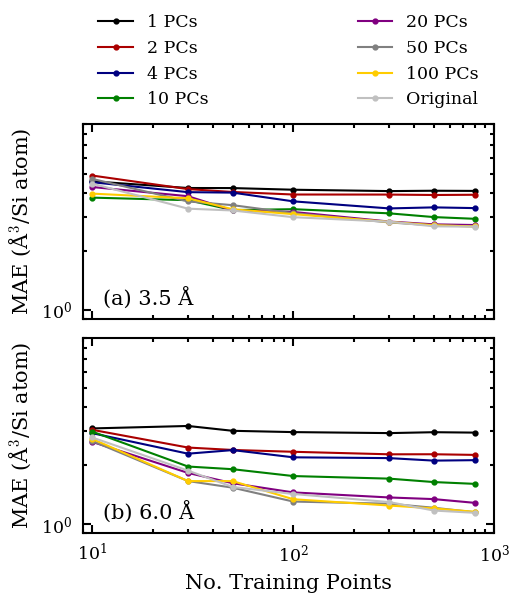

In [41]:
# Load DEEM 1k learning curves from KPCA (volume)
vol3 = np.load('../Processed_Data/DEEM_1k/Volume/3.5/Gaussian/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_1k/Volume/6.0/Gaussian/maeAvgTest.npy')
PCALearn3 = np.load('../Processed_Data/DEEM_1k/Volume/3.5/KPCALearn/Gaussian/maeAvgTest.npy')
PCALearn6 = np.load('../Processed_Data/DEEM_1k/Volume/6.0/KPCALearn/Gaussian/maeAvgTest.npy')

# Scale volume errors and standard deviation to A^3/Si atom
vol3 = scale_error_matrix(vol3)
vol6 = scale_error_matrix(vol6)
PCALearn3 = scale_error_matrix(PCALearn3)
PCALearn6 = scale_error_matrix(PCALearn6)

figLearn = plt.figure(figsize=(3.54, 3.54))
axs3 = figLearn.add_subplot(2, 1, 1)
axs6 = figLearn.add_subplot(2, 1, 2)

axs6.set_xlabel('No. Training Points')    
axs3.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axs6.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')

for i in np.arange(0, PCALearn3.shape[0]):
    axs3.loglog(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn3[i, 0, 0, 0, 0, 0]), c=colorList[i])
    axs6.loglog(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn6[i, 0, 0, 0, 0, 0]), c=colorList[i])
    
"""axs3.set_prop_cycle(None)
axs6.set_prop_cycle(None)
for i in np.arange(0, PCALearn3.shape[0]):    
    axs3.errorbar(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5],
                 yerr=PCALearn3[i, 0, 0, 0, :, 6], fmt='none')
    axs6.errorbar(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5],
                 yerr=PCALearn6[i, 0, 0, 0, :, 6])"""

axs3.loglog(vol3[0, 0, 0, 0, :, 4], vol3[0, 0, 0, 0, :, 5], marker='o', label='Original', c=colorList[-1])
#axs3.errorbar(vol3[0, 0, 0, 0, :, 4], vol3[0, 0, 0, 0, :, 5], yerr=vol3[0, 0, 0, 0, :, 6],
#             fmt='none', ecolor=colorList[-1])
axs6.loglog(vol6[0, 0, 0, 0, :, 4], vol6[0, 0, 0, 0, :, 5], marker='o', label='Original', c=colorList[-1])
#axs6.errorbar(vol3[0, 0, 0, 0, :, 4], vol6[0, 0, 0, 0, :, 5], yerr=vol6[0, 0, 0, 0, :, 6],
#             fmt='none', ecolor=colorList[-1])

axs3.text(0.05, 0.05, u'(a) 3.5 \u00c5', horizontalalignment='left', verticalalignment='bottom', 
               transform=axs3.transAxes, fontsize='medium')
axs6.text(0.05, 0.05, u'(b) 6.0 \u00c5', horizontalalignment='left', verticalalignment='bottom',
               transform=axs6.transAxes, fontsize='medium')

axs3.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axs3.set_xlim([9, 1000])
axs6.set_xlim([9, 1000])
#axs3.set_ylim([0.3, 3])
axs3.set_ylim([0.9, 9])
#axs6.set_ylim([0.3, 3])
axs6.set_ylim([0.9, 9])

axs3.set_xticklabels([])
axs3.tick_params(axis='y', which='minor', labelleft=False)
axs6.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_1k/learn_KPCA_volume_1k.pdf', bbox_inches='tight')
plt.show()

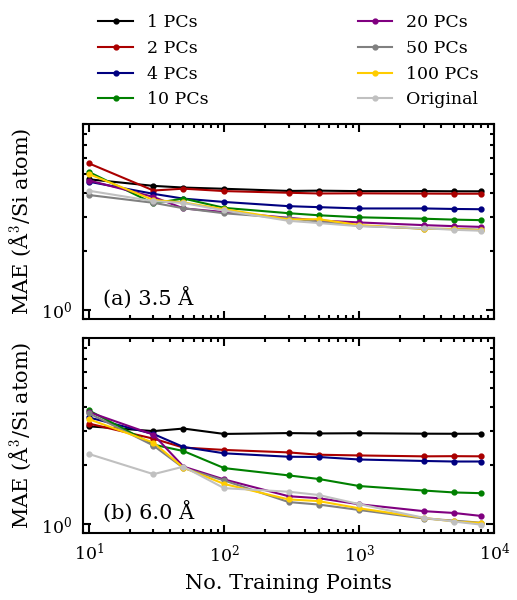

In [42]:
# Load DEEM 10k learning curves from KPCA (volume)
vol3 = np.load('../Processed_Data/DEEM_10k/Volume/3.5/Gaussian/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_10k/Volume/6.0/Gaussian/maeAvgTest.npy')
PCALearn3 = np.load('../Processed_Data/DEEM_10k/Volume/3.5/KPCALearn/Gaussian/maeAvgTest.npy')
PCALearn6 = np.load('../Processed_Data/DEEM_10k/Volume/6.0/KPCALearn/Gaussian/maeAvgTest.npy')

# Scale volume errors and standard deviation to A^3/Si atom
vol3 = scale_error_matrix(vol3)
vol6 = scale_error_matrix(vol6)
PCALearn3 = scale_error_matrix(PCALearn3)
PCALearn6 = scale_error_matrix(PCALearn6)

figLearn = plt.figure(figsize=(3.54, 3.54))
axs3 = figLearn.add_subplot(2, 1, 1)
axs6 = figLearn.add_subplot(2, 1, 2)

axs6.set_xlabel('No. Training Points')    
axs3.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axs6.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')

for i in np.arange(0, PCALearn3.shape[0]):
    axs3.loglog(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5], 
                marker='o', label=str('%d PCs' % PCALearn3[i, 0, 0, 0, 0, 0]), c=colorList[i])
    axs6.loglog(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], 
                marker='o', label=str('%d PCs' % PCALearn6[i, 0, 0, 0, 0, 0]), c=colorList[i])
    
"""axs3.set_prop_cycle(None)
axs6.set_prop_cycle(None)
for i in np.arange(0, PCALearn3.shape[0]):    
    axs3.errorbar(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5],
                 yerr=PCALearn3[i, 0, 0, 0, :, 6], fmt='none')
    axs6.errorbar(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5],
                 yerr=PCALearn6[i, 0, 0, 0, :, 6])"""

axs3.loglog(vol3[0, 0, 0, 0, :, 4], vol3[0, 0, 0, 0, :, 5], marker='o', label='Original', c=colorList[-1])
#axs3.errorbar(vol3[0, 0, 0, 0, :, 4], vol3[0, 0, 0, 0, :, 5], yerr=vol3[0, 0, 0, 0, :, 6],
#             fmt='none', ecolor=colorList[-1])
axs6.loglog(vol6[0, 0, 0, 0, :, 4], vol6[0, 0, 0, 0, :, 5], marker='o', label='Original', c = colorList[-1])
#axs6.errorbar(vol6[0, 0, 0, 0, :, 4], vol6[0, 0, 0, 0, :, 5], yerr=vol6[0, 0, 0, 0, :, 6],
#             fmt='none', ecolor=colorList[-1])

axs3.text(0.05, 0.05, u'(a) 3.5 \u00c5', horizontalalignment='left', verticalalignment='bottom', 
               transform=axs3.transAxes, fontsize='medium')
  
axs6.text(0.05, 0.05, u'(b) 6.0 \u00c5', horizontalalignment='left', verticalalignment='bottom',
               transform=axs6.transAxes, fontsize='medium')

axs3.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axs3.set_xlim([9, 10000])
axs6.set_xlim([9, 10000])
#axs3.set_ylim([0.3, 3])
axs3.set_ylim([0.9, 9])
#axs6.set_ylim([0.3, 3])
axs6.set_ylim([0.9, 9])

axs3.set_xticklabels([])
axs3.tick_params(axis='y', which='minor', labelleft=False)
axs6.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_10k/learn_KPCA_volume_10k.pdf', bbox_inches='tight')
plt.show()

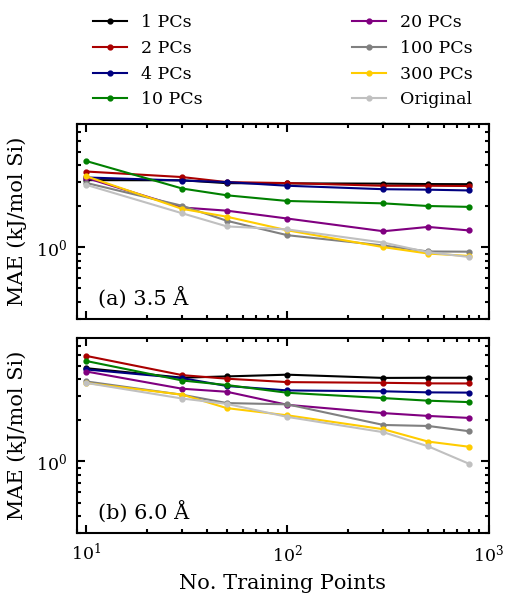

In [43]:
# Load DEEM 1k learning curves from KPCA (energy)
e3 = np.load('../Processed_Data/DEEM_1k/Energy/3.5/Gaussian/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_1k/Energy/6.0/Gaussian/maeAvgTest.npy')

PCALearn3 = np.load('../Processed_Data/DEEM_1k/Energy/3.5/KPCALearn/Gaussian/maeAvgTest.npy')
PCALearn6 = np.load('../Processed_Data/DEEM_1k/Energy/6.0/KPCALearn/Gaussian/maeAvgTest.npy')

figLearn = plt.figure(figsize=(3.54, 3.54))
axs3 = figLearn.add_subplot(2, 1, 1)
axs6 = figLearn.add_subplot(2, 1, 2)

axs6.set_xlabel('No. Training Points')    
axs3.set_ylabel('MAE (kJ/mol Si)')
axs6.set_ylabel('MAE (kJ/mol Si)')

for i in np.arange(PCALearn3.shape[0]):
    axs3.loglog(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn3[i, 0, 0, 0, 0, 0]), c=colorList[i])
    axs6.loglog(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn6[i, 0, 0, 0, 0, 0]), c=colorList[i])
    
"""axs3.set_prop_cycle(None)
axs6.set_prop_cycle(None)
for i in np.arange(0, PCALearn3.shape[0]):    
    axs3.errorbar(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5],
                 yerr=PCALearn3[i, 0, 0, 0, :, 6], fmt='none')
    axs6.errorbar(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5],
                 yerr=PCALearn6[i, 0, 0, 0, :, 6], fmt='none')"""

axs3.loglog(e3[0, 0, 0, 0, :, 4], e3[0, 0, 0, 0, :, 5], marker='o', label='Original', c=colorList[-1])
#axs3.errorbar(e3[0, 0, 0, 0, :, 4], e3[0, 0, 0, 0, :, 5], yerr=e3[0, 0, 0, 0, :, 6], 
#              fmt='none', ecolor=colorList[-1])
axs6.loglog(e6[0, 0, 0, 0, :, 4], e6[0, 0, 0, 0, :, 5], marker='o', label='Original', c=colorList[-1])
#axs6.errorbar(e6[0, 0, 0, 0, :, 4], e6[0, 0, 0, 0, :, 5], yerr=e6[0, 0, 0, 0, :, 6], 
#              fmt='none', ecolor=colorList[-1])

axs3.text(0.05, 0.05, u'(a) 3.5 \u00c5', horizontalalignment='left', verticalalignment='bottom', 
               transform=axs3.transAxes, fontsize='medium')

    
axs6.text(0.05, 0.05, u'(b) 6.0 \u00c5', horizontalalignment='left', verticalalignment='bottom',
               transform=axs6.transAxes, fontsize='medium')

axs3.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axs3.set_xlim([9, 1000])
axs6.set_xlim([9, 1000])
axs3.set_ylim([0.3, 8])
axs6.set_ylim([0.3, 8])

axs3.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_labels()

figLearn.savefig('../Results/DEEM_1k/learn_KPCA_energy_1k.pdf', bbox_inches='tight')
plt.show()

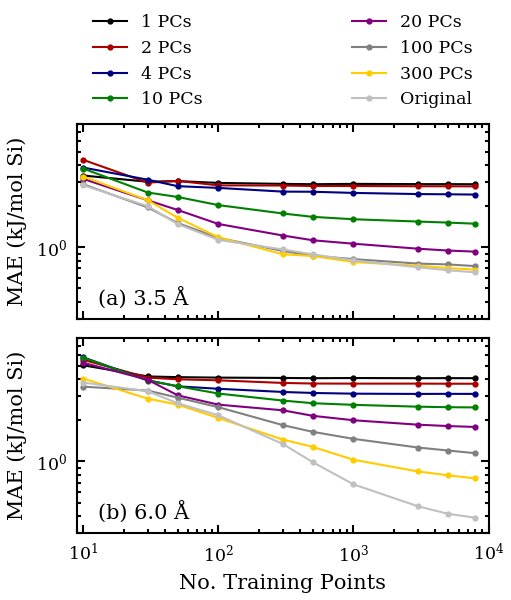

In [44]:
# Load DEEM 10k learning curves from KPCA (energy)
e3 = np.load('../Processed_Data/DEEM_10k/Energy/3.5/Gaussian/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_10k/Energy/6.0/Gaussian/maeAvgTest.npy')
PCALearn3 = np.load('../Processed_Data/DEEM_10k/Energy/3.5/KPCALearn/Gaussian/maeAvgTest.npy')
PCALearn6 = np.load('../Processed_Data/DEEM_10k/Energy/6.0/KPCALearn/Gaussian/maeAvgTest.npy')
#PCALearn6 = np.load('../Scripts/test3/10k/maeAvgTest.npy')

figLearn = plt.figure(figsize=(3.54, 3.54))
axs3 = figLearn.add_subplot(2, 1, 1)
axs6 = figLearn.add_subplot(2, 1, 2)

axs6.set_xlabel('No. Training Points')    
axs3.set_ylabel('MAE (kJ/mol Si)')
axs6.set_ylabel('MAE (kJ/mol Si)')

for i in np.arange(0, PCALearn3.shape[0]):
    axs3.loglog(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn3[i, 0, 0, 0, 0, 0]), c=colorList[i])
    axs6.loglog(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn6[i, 0, 0, 0, 0, 0]), c=colorList[i])

"""axs3.set_prop_cycle(None)
axs6.set_prop_cycle(None)
for i in np.arange(0, PCALearn3.shape[0]):
    axs3.errorbar(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5],
                  yerr=PCALearn3[i, 0, 0, 0, :, 6], fmt='none')
    axs6.errorbar(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], 
                  yerr=PCALearn6[i, 0, 0, 0, :, 6], fmt='none')"""
    
axs3.loglog(e3[0, 0, 0, 0, :, 4], e3[0, 0, 0, 0, :, 5], marker='o', label='Original', c=colorList[-1])
#axs3.errorbar(e3[0, 0, 0, 0, :, 4], e3[0, 0, 0, 0, :, 5], yerr=e3[0, 0, 0, 0, :, 6], 
#              fmt='none', ecolor=colorList[-1])
axs6.loglog(e6[0, 0, 0, 0, :, 4], e6[0, 0, 0, 0, :, 5], marker='o', label='Original', c=colorList[-1])
#axs6.errorbar(e6[0, 0, 0, 0, :, 4], e6[0, 0, 0, 0, :, 5], yerr=e6[0, 0, 0, 0, :, 6],
#             fmt='none', ecolor=colorList[-1])

axs3.text(0.05, 0.05, u'(a) 3.5 \u00c5', horizontalalignment='left', verticalalignment='bottom', 
               transform=axs3.transAxes, fontsize='medium')
  
axs6.text(0.05, 0.05, u'(b) 6.0 \u00c5', horizontalalignment='left', verticalalignment='bottom',
               transform=axs6.transAxes, fontsize='medium')

axs3.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axs3.set_xlim([9, 10000])
axs6.set_xlim([9, 10000])
axs3.set_ylim([0.3, 8])
axs6.set_ylim([0.3, 8])

axs3.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_10k/learn_KPCA_energy_10k.pdf', bbox_inches='tight')
plt.show()

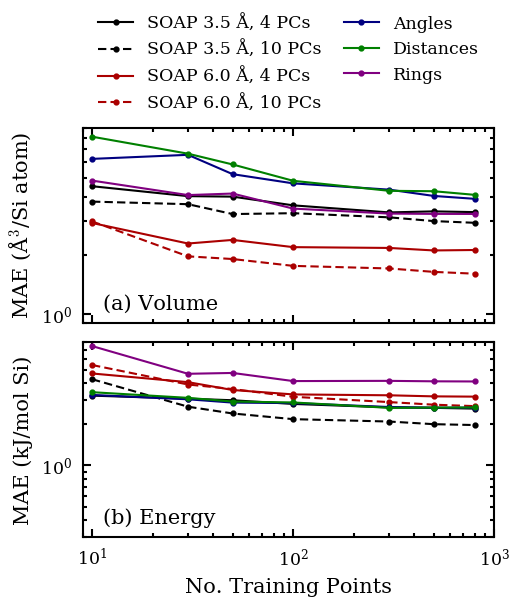

In [45]:
# Load DEEM 1k learning curves

vol3 = np.load('../Processed_Data/DEEM_1k/Volume/3.5/KPCALearn/Gaussian/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_1k/Volume/6.0/KPCALearn/Gaussian/maeAvgTest.npy')
e3 = np.load('../Processed_Data/DEEM_1k/Energy/3.5/KPCALearn/Gaussian/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_1k/Energy/6.0/KPCALearn/Gaussian/maeAvgTest.npy')
volD = np.load('../Processed_Data/DEEM_1k/Volume/Distances/Gaussian/maeAvgTest.npy')
volA = np.load('../Processed_Data/DEEM_1k/Volume/Angles/Gaussian/maeAvgTest.npy')
volR = np.load('../Processed_Data/DEEM_1k/Volume/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')
eD = np.load('../Processed_Data/DEEM_1k/Energy/Distances/Gaussian/maeAvgTest.npy')
eA = np.load('../Processed_Data/DEEM_1k/Energy/Angles/Gaussian/maeAvgTest.npy')
eR = np.load('../Processed_Data/DEEM_1k/Energy/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')

# Scale volume errors and standard deviation to A^3/Si atom
vol3 = scale_error_matrix(vol3)
vol6 = scale_error_matrix(vol6)
volD = scale_error_matrix(volD)
volA = scale_error_matrix(volA)
volR = scale_error_matrix(volR)

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axsEnergy.set_ylabel('MAE (kJ/mol Si)')

axsVolume.loglog(vol3[2, 0, 0, 0, :, 4], vol3[2, 0, 0, 0, :, 5], marker='o', c=cc[0],
                 label=u'SOAP 3.5 \u00c5, 4 PCs')
axsVolume.loglog(vol3[3, 0, 0, 0, :, 4], vol3[3, 0, 0, 0, :, 5], marker='o', c=cc[0], linestyle='--',
                 label=u'SOAP 3.5 \u00c5, 10 PCs')
axsVolume.loglog(vol6[2, 0, 0, 0, :, 4], vol6[2, 0, 0, 0, :, 5], marker='o', c=cc[1],
                 label=u'SOAP 6.0 \u00c5, 4 PCs')
axsVolume.loglog(vol6[3, 0, 0, 0, :, 4], vol6[3, 0, 0, 0, :, 5], marker='o', c=cc[1], linestyle='--',
                 label=u'SOAP 6.0 \u00c5, 10 PCs')
axsVolume.loglog(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], marker='o', c=cc[2],
                 label='Angles')
axsVolume.loglog(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], marker='o', c=cc[3],
                 label='Distances')
axsVolume.loglog(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], marker='o', c=cc[4],
                 label='Rings')
axsVolume.text(0.05, 0.05, '(a) Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(e3[2, 0, 0, 0, :, 4], e3[2, 0, 0, 0, :, 5], marker='o', c=cc[0],
                 label=u'SOAP 3.5 \u00c5, 4 PCs')
axsEnergy.loglog(e3[3, 0, 0, 0, :, 4], e3[3, 0, 0, 0, :, 5], marker='o', c=cc[0], linestyle='--',
                 label=u'SOAP 3.5 \u00c5, 10 PCs')
axsEnergy.loglog(e6[2, 0, 0, 0, :, 4], e6[2, 0, 0, 0, :, 5], marker='o', c=cc[1],
                 label=u'SOAP 6.0 \u00c5, 4 PCs')
axsEnergy.loglog(e6[3, 0, 0, 0, :, 4], e6[3, 0, 0, 0, :, 5], marker='o', c=cc[1], linestyle='--',
                 label=u'SOAP 6.0 \u00c5, 10 PCs')
axsEnergy.loglog(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], marker='o', c=cc[2],
                 label='Angles')
axsEnergy.loglog(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], marker='o', c=cc[3],
                 label='Distances')
axsEnergy.loglog(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], marker='o', c=cc[4],
                 label='Rings')
axsEnergy.text(0.05, 0.05, '(b) Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

"""axsVolume.set_prop_cycle(None)
axsEnergy.set_prop_cycle(None)

axsVolume.errorbar(vol3[2, 0, 0, 0, :, 4], vol3[2, 0, 0, 0, :, 5], yerr=vol3[2, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(vol3[3, 0, 0, 0, :, 4], vol3[3, 0, 0, 0, :, 5], yerr=vol3[3, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(vol6[2, 0, 0, 0, :, 4], vol6[2, 0, 0, 0, :, 5], yerr=vol6[2, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(vol6[3, 0, 0, 0, :, 4], vol6[3, 0, 0, 0, :, 5], yerr=vol6[3, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], yerr=volA[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], yerr=volD[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], yerr=volR[0, 0, 0, 0, :, 6], fmt='none')

axsEnergy.errorbar(e3[2, 0, 0, 0, :, 4], e3[2, 0, 0, 0, :, 5], yerr=e3[2, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(e3[3, 0, 0, 0, :, 4], e3[3, 0, 0, 0, :, 5], yerr=e3[3, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(e6[2, 0, 0, 0, :, 4], e6[2, 0, 0, 0, :, 5], yerr=e6[2, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(e6[3, 0, 0, 0, :, 4], e6[3, 0, 0, 0, :, 5], yerr=e6[3, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], yerr=eA[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], yerr=eD[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], yerr=eR[0, 0, 0, 0, :, 6], fmt='none')"""

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axsVolume.set_xlim([9, 1000])
axsEnergy.set_xlim([9, 1000])
#axsVolume.set_ylim([0.3, 3])
axsVolume.set_ylim([0.9, 9])
axsEnergy.set_ylim([0.3, 8])

axsVolume.set_xticklabels([])
axsVolume.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_1k/learn_KPCA-Dim_1k.pdf', bbox_inches='tight')
plt.show()

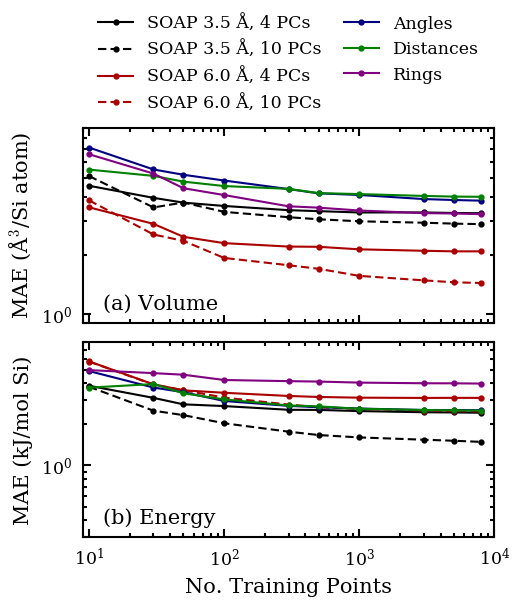

In [46]:
# Load DEEM 10k learning curves
vol3 = np.load('../Processed_Data/DEEM_10k/Volume/3.5/KPCALearn/Gaussian/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_10k/Volume/6.0/KPCALearn/Gaussian/maeAvgTest.npy')
e3 = np.load('../Processed_Data/DEEM_10k/Energy/3.5/KPCALearn/Gaussian/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_10k/Energy/6.0/KPCALearn/Gaussian/maeAvgTest.npy')
volD = np.load('../Processed_Data/DEEM_10k/Volume/Distances/Gaussian/maeAvgTest.npy') 
volA = np.load('../Processed_Data/DEEM_10k/Volume/Angles/Gaussian/maeAvgTest.npy') 
volR = np.load('../Processed_Data/DEEM_10k/Volume/Rings/Short/Distribution/Gaussian/maeAvgTest.npy') 
eD = np.load('../Processed_Data/DEEM_10k/Energy/Distances/Gaussian/maeAvgTest.npy') 
eA = np.load('../Processed_Data/DEEM_10k/Energy/Angles/Gaussian/maeAvgTest.npy') 
eR = np.load('../Processed_Data/DEEM_10k/Energy/Rings/Short/Distribution/Gaussian/maeAvgTest.npy')

# Scale volume errors and standard deviation to A^3/Si atom
vol3 = scale_error_matrix(vol3)
vol6 = scale_error_matrix(vol6)
volD = scale_error_matrix(volD)
volA = scale_error_matrix(volA)
volR = scale_error_matrix(volR)

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axsEnergy.set_ylabel('MAE (kJ/mol Si)')

axsVolume.loglog(vol3[2, 0, 0, 0, :, 4], vol3[2, 0, 0, 0, :, 5], marker='o', c=cc[0],
                 label=u'SOAP 3.5 \u00c5, 4 PCs')
axsVolume.loglog(vol3[3, 0, 0, 0, :, 4], vol3[3, 0, 0, 0, :, 5], marker='o', c=cc[0], linestyle='--',
                 label=u'SOAP 3.5 \u00c5, 10 PCs')
axsVolume.loglog(vol6[2, 0, 0, 0, :, 4], vol6[2, 0, 0, 0, :, 5], marker='o', c=cc[1],
                 label=u'SOAP 6.0 \u00c5, 4 PCs')
axsVolume.loglog(vol6[3, 0, 0, 0, :, 4], vol6[3, 0, 0, 0, :, 5], marker='o', c=cc[1], linestyle='--',
                 label=u'SOAP 6.0 \u00c5, 10 PCs')
axsVolume.loglog(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], marker='o', c=cc[2],
                 label='Angles')
axsVolume.loglog(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], marker='o', c=cc[3],
                 label='Distances')
axsVolume.loglog(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], marker='o', c=cc[4],
                 label='Rings')
axsVolume.text(0.05, 0.05, '(a) Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(e3[2, 0, 0, 0, :, 4], e3[2, 0, 0, 0, :, 5], marker='o', c=cc[0],
                 label=u'SOAP 3.5 \u00c5, 4 PCs')
axsEnergy.loglog(e3[3, 0, 0, 0, :, 4], e3[3, 0, 0, 0, :, 5], marker='o', c=cc[0], linestyle='--',
                 label=u'SOAP 3.5 \u00c5, 10 PCs')
axsEnergy.loglog(e6[2, 0, 0, 0, :, 4], e6[2, 0, 0, 0, :, 5], marker='o', c=cc[1],
                 label=u'SOAP 6.0 \u00c5, 4 PCs')
axsEnergy.loglog(e6[3, 0, 0, 0, :, 4], e6[3, 0, 0, 0, :, 5], marker='o', c=cc[1], linestyle='--',
                 label=u'SOAP 6.0 \u00c5, 10 PCs')
axsEnergy.loglog(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], marker='o', c=cc[2],
                 label='Angles')
axsEnergy.loglog(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], marker='o', c=cc[3],
                 label='Distances')
axsEnergy.loglog(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], marker='o', c=cc[4],
                 label='Rings')
axsEnergy.text(0.05, 0.05, '(b) Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

"""axsVolume.set_prop_cycle(None)
axsEnergy.set_prop_cycle(None)

axsVolume.errorbar(vol3[2, 0, 0, 0, :, 4], vol3[2, 0, 0, 0, :, 5], yerr=vol3[2, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(vol3[3, 0, 0, 0, :, 4], vol3[3, 0, 0, 0, :, 5], yerr=vol3[3, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(vol6[2, 0, 0, 0, :, 4], vol6[2, 0, 0, 0, :, 5], yerr=vol6[2, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(vol6[3, 0, 0, 0, :, 4], vol6[3, 0, 0, 0, :, 5], yerr=vol6[3, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], yerr=volA[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], yerr=volD[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], yerr=volR[0, 0, 0, 0, :, 6], fmt='none')

axsEnergy.errorbar(e3[2, 0, 0, 0, :, 4], e3[2, 0, 0, 0, :, 5], yerr=e3[2, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(e3[3, 0, 0, 0, :, 4], e3[3, 0, 0, 0, :, 5], yerr=e3[3, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(e6[2, 0, 0, 0, :, 4], e6[2, 0, 0, 0, :, 5], yerr=e6[2, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(e6[3, 0, 0, 0, :, 4], e6[3, 0, 0, 0, :, 5], yerr=e6[3, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], yerr=eA[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], yerr=eD[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], yerr=eR[0, 0, 0, 0, :, 6], fmt='none')"""

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axsVolume.set_xlim([9, 10000])
axsEnergy.set_xlim([9, 10000])
#axsVolume.set_ylim([0.3, 3])
axsVolume.set_ylim([0.9, 9])
axsEnergy.set_ylim([0.3, 8])

axsVolume.set_xticklabels([])
axsVolume.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_10k/learn_KPCA-Dim_10k.pdf', bbox_inches='tight')
plt.show()